In [1]:
import os
import pandas as pd
import numpy as np

In [4]:
os.chdir("D:\\study\\imarticus\\python\\pandas files")

# DATA DESCRIPTION
We have train (8523) and test (5681) data set, train data set has both input and output
variable(s). We need to predict the sales for test data set.

# ATTRIBUTE INFORMATION


Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the
particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome
variable to be predicted.


In [5]:
train_raw = pd.read_csv("Stores Sales Prediction.csv")

In [6]:
train_raw

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [9]:
train_raw.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
IW_null = train_raw[train_raw["Item_Weight"].isnull()]

In [12]:
IW_nnull = train_raw[train_raw["Item_Weight"].notnull()]


In [13]:
train_raw["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [7]:
train_raw["Outlet_Size"] = train_raw["Outlet_Size"].replace({"Small":0,"Medium":1,"High":2})

In [8]:
df_num = [col for col in train_raw.columns if train_raw[col].dtype != "object"]


In [16]:
train_raw[df_num]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,1.0,3735.1380
1,5.920,0.019278,48.2692,2009,1.0,443.4228
2,17.500,0.016760,141.6180,1999,1.0,2097.2700
3,19.200,0.000000,182.0950,1998,NaN,732.3800
4,8.930,0.000000,53.8614,1987,2.0,994.7052
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2.0,2778.3834
8519,8.380,0.046982,108.1570,2002,NaN,549.2850
8520,10.600,0.035186,85.1224,2004,0.0,1193.1136
8521,7.210,0.145221,103.1332,2009,1.0,1845.5976


In [9]:
from sklearn.impute import KNNImputer

In [10]:
knn = KNNImputer(n_neighbors = 5)

In [11]:
knn.fit(train_raw[df_num])

KNNImputer()

In [12]:
num = pd.DataFrame(knn.transform(train_raw[df_num]))
num

,0,1,2,3,4,5
0,9.300,0.016047,249.8092,1999.0,1.0,3735.1380
1,5.920,0.019278,48.2692,2009.0,1.0,443.4228
2,17.500,0.016760,141.6180,1999.0,1.0,2097.2700
3,19.200,0.000000,182.0950,1998.0,0.4,732.3800
4,8.930,0.000000,53.8614,1987.0,2.0,994.7052
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,2.0,2778.3834
8519,8.380,0.046982,108.1570,2002.0,0.8,549.2850
8520,10.600,0.035186,85.1224,2004.0,0.0,1193.1136
8521,7.210,0.145221,103.1332,2009.0,1.0,1845.5976


In [13]:
train_raw[df_num]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,1.0,3735.1380
1,5.920,0.019278,48.2692,2009,1.0,443.4228
2,17.500,0.016760,141.6180,1999,1.0,2097.2700
3,19.200,0.000000,182.0950,1998,NaN,732.3800
4,8.930,0.000000,53.8614,1987,2.0,994.7052
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2.0,2778.3834
8519,8.380,0.046982,108.1570,2002,NaN,549.2850
8520,10.600,0.035186,85.1224,2004,0.0,1193.1136
8521,7.210,0.145221,103.1332,2009,1.0,1845.5976


In [14]:
num = num.rename(columns = {0:"Item_Weight"})

In [15]:
num = num.rename(columns = {1:"Item_Visibility",2:"Item_MRP",3:"Outlet_Establishment_Year",4:"Outlet_Size",5:"Item_Outlet_Sales"})

In [71]:
num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999.0,1.0,3735.1380
1,5.920,0.019278,48.2692,2009.0,1.0,443.4228
2,17.500,0.016760,141.6180,1999.0,1.0,2097.2700
3,19.200,0.000000,182.0950,1998.0,0.4,732.3800
4,8.930,0.000000,53.8614,1987.0,2.0,994.7052
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,2.0,2778.3834
8519,8.380,0.046982,108.1570,2002.0,0.8,549.2850
8520,10.600,0.035186,85.1224,2004.0,0.0,1193.1136
8521,7.210,0.145221,103.1332,2009.0,1.0,1845.5976


In [16]:
cat = [col for col in train_raw.columns if train_raw[col].dtype == "object"]
cat

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type']

In [17]:
cate = train_raw[cat]

In [18]:
Train = pd.concat([cate,num],axis = 1)

In [19]:
Train = Train.copy()

In [20]:
Train.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Item_Outlet_Sales            0
dtype: int64

In [79]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Type                  8523 non-null   object 
 3   Outlet_Identifier          8523 non-null   object 
 4   Outlet_Location_Type       8523 non-null   object 
 5   Outlet_Type                8523 non-null   object 
 6   Item_Weight                8523 non-null   float64
 7   Item_Visibility            8523 non-null   float64
 8   Item_MRP                   8523 non-null   float64
 9   Outlet_Establishment_Year  8523 non-null   float64
 10  Outlet_Size                8523 non-null   float64
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(6), object(6)
memory usage: 799.2+ KB


In [16]:
Train["Outlet_Size"].value_counts()

1.0    2996
0.0    2640
2.0     932
0.6     616
0.4     525
0.8     397
0.2     309
1.2      76
1.4      25
1.6       7
Name: Outlet_Size, dtype: int64

In [103]:
train_raw["Outlet_Size"].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [21]:
Train["Outlet_Size"] = Train["Outlet_Size"].replace({0.0:"Small",0.2:"Small",0.4:"Small",0.6:"Small",0.8:"Medium",1.0:"Medium",
                                                    1.2:"Medium",1.4:"Medium",1.6:"High",2.0:"High"})

In [111]:
Train["Outlet_Size"].value_counts()

Small    4487
1.0      2996
2.0       932
1.2        76
1.4        25
1.6         7
Name: Outlet_Size, dtype: int64

In [23]:
Train_Raw = Train.copy()

In [26]:
Train_Raw

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
0,FDA15,Low Fat,Dairy,OUT049,Tier 1,Supermarket Type1,9.300,0.016047,249.8092,1999.0,Medium,3735.1380
1,DRC01,Regular,Soft Drinks,OUT018,Tier 3,Supermarket Type2,5.920,0.019278,48.2692,2009.0,Medium,443.4228
2,FDN15,Low Fat,Meat,OUT049,Tier 1,Supermarket Type1,17.500,0.016760,141.6180,1999.0,Medium,2097.2700
3,FDX07,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store,19.200,0.000000,182.0950,1998.0,Small,732.3800
4,NCD19,Low Fat,Household,OUT013,Tier 3,Supermarket Type1,8.930,0.000000,53.8614,1987.0,High,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,Tier 3,Supermarket Type1,6.865,0.056783,214.5218,1987.0,High,2778.3834
8519,FDS36,Regular,Baking Goods,OUT045,Tier 2,Supermarket Type1,8.380,0.046982,108.1570,2002.0,Medium,549.2850
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Tier 2,Supermarket Type1,10.600,0.035186,85.1224,2004.0,Small,1193.1136
8521,FDN46,Regular,Snack Foods,OUT018,Tier 3,Supermarket Type2,7.210,0.145221,103.1332,2009.0,Medium,1845.5976


In [118]:
Train_Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Type                  8523 non-null   object 
 3   Outlet_Identifier          8523 non-null   object 
 4   Outlet_Location_Type       8523 non-null   object 
 5   Outlet_Type                8523 non-null   object 
 6   Item_Weight                8523 non-null   float64
 7   Item_Visibility            8523 non-null   float64
 8   Item_MRP                   8523 non-null   float64
 9   Outlet_Establishment_Year  8523 non-null   float64
 10  Outlet_Size                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), object(7)
memory usage: 799.2+ KB


In [24]:
Train_Raw = Train_Raw.drop(["Item_Identifier","Outlet_Identifier"],axis = 1)

In [121]:
Train_Raw

,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
0,Low Fat,Dairy,Tier 1,Supermarket Type1,9.300,0.016047,249.8092,1999.0,Medium,3735.1380
1,Regular,Soft Drinks,Tier 3,Supermarket Type2,5.920,0.019278,48.2692,2009.0,Medium,443.4228
2,Low Fat,Meat,Tier 1,Supermarket Type1,17.500,0.016760,141.6180,1999.0,Medium,2097.2700
3,Regular,Fruits and Vegetables,Tier 3,Grocery Store,19.200,0.000000,182.0950,1998.0,Small,732.3800
4,Low Fat,Household,Tier 3,Supermarket Type1,8.930,0.000000,53.8614,1987.0,High,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,Tier 3,Supermarket Type1,6.865,0.056783,214.5218,1987.0,High,2778.3834
8519,Regular,Baking Goods,Tier 2,Supermarket Type1,8.380,0.046982,108.1570,2002.0,Medium,549.2850
8520,Low Fat,Health and Hygiene,Tier 2,Supermarket Type1,10.600,0.035186,85.1224,2004.0,Small,1193.1136
8521,Regular,Snack Foods,Tier 3,Supermarket Type2,7.210,0.145221,103.1332,2009.0,Medium,1845.5976


In [123]:
Train_Raw["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
Train_Raw["Item_Fat_Content"] =Train_Raw["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})

In [29]:
Train_Raw["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [30]:
Train_Raw["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [26]:
import datetime as dt
current_year = dt.datetime.now().year

In [27]:
Train_Raw["Outlet_Age"] = current_year- Train_Raw["Outlet_Establishment_Year"]

In [28]:
Train_Raw = Train_Raw.drop("Outlet_Establishment_Year",axis = 1)

In [139]:
Train_Raw

,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Age
0,Low Fat,Dairy,Tier 1,Supermarket Type1,9.300,0.016047,249.8092,Medium,3735.1380,22
1,Regular,Soft Drinks,Tier 3,Supermarket Type2,5.920,0.019278,48.2692,Medium,443.4228,12
2,Low Fat,Meat,Tier 1,Supermarket Type1,17.500,0.016760,141.6180,Medium,2097.2700,22
3,Regular,Fruits and Vegetables,Tier 3,Grocery Store,19.200,0.000000,182.0950,Small,732.3800,23
4,Low Fat,Household,Tier 3,Supermarket Type1,8.930,0.000000,53.8614,High,994.7052,34
...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,Tier 3,Supermarket Type1,6.865,0.056783,214.5218,High,2778.3834,34
8519,Regular,Baking Goods,Tier 2,Supermarket Type1,8.380,0.046982,108.1570,Medium,549.2850,19
8520,Low Fat,Health and Hygiene,Tier 2,Supermarket Type1,10.600,0.035186,85.1224,Small,1193.1136,17
8521,Regular,Snack Foods,Tier 3,Supermarket Type2,7.210,0.145221,103.1332,Medium,1845.5976,12


In [29]:
Train_Raw["Outlet_Age"] = Train_Raw["Outlet_Age"].astype("int64")

In [77]:
Train_Raw

,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Age
0,Low Fat,Dairy,Tier 1,Supermarket Type1,9.300,0.016047,249.8092,Medium,3735.1380,22
1,Regular,Soft Drinks,Tier 3,Supermarket Type2,5.920,0.019278,48.2692,Medium,443.4228,12
2,Low Fat,Meat,Tier 1,Supermarket Type1,17.500,0.016760,141.6180,Medium,2097.2700,22
3,Regular,Fruits and Vegetables,Tier 3,Grocery Store,19.200,0.000000,182.0950,Small,732.3800,23
4,Low Fat,Household,Tier 3,Supermarket Type1,8.930,0.000000,53.8614,High,994.7052,34
...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,Tier 3,Supermarket Type1,6.865,0.056783,214.5218,High,2778.3834,34
8519,Regular,Baking Goods,Tier 2,Supermarket Type1,8.380,0.046982,108.1570,Medium,549.2850,19
8520,Low Fat,Health and Hygiene,Tier 2,Supermarket Type1,10.600,0.035186,85.1224,Small,1193.1136,17
8521,Regular,Snack Foods,Tier 3,Supermarket Type2,7.210,0.145221,103.1332,Medium,1845.5976,12


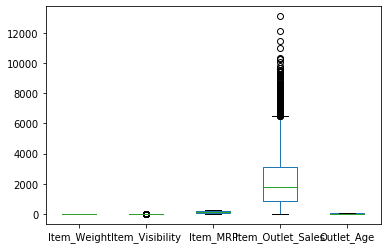

In [46]:
Train_Raw.plot(kind = "box");

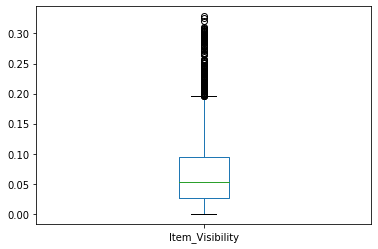

In [48]:
Train_Raw["Item_Visibility"].plot(kind = "box");

In [30]:
Q1 = Train_Raw["Item_Visibility"].quantile(q = 0.25)
Q3 = Train_Raw["Item_Visibility"].quantile(q = 0.75)

IQR = Q3 - Q1

LowerBond = Q1 - (1.5*IQR)
UpperBond= Q3 + (1.5*IQR)

print(UpperBond)
print(LowerBond)

0.195979015
-0.07440424500000001


In [31]:
Train_Raw["Item_Visibility"] = np.where(Train_Raw["Item_Visibility"] > UpperBond,UpperBond,Train_Raw["Item_Visibility"])


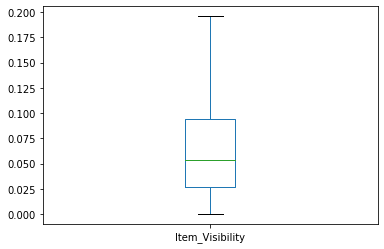

In [30]:
Train_Raw["Item_Visibility"].plot(kind = "box");

In [79]:
Train_Raw.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.843826,0.065307,140.992782,2181.288914,23.168133
std,4.313180,0.048841,62.275067,1706.499616,8.371760
min,4.555000,0.000000,31.290000,33.290000,12.000000
25%,9.300000,0.026989,93.826500,834.247400,17.000000
50%,12.600000,0.053931,143.012800,1794.331000,22.000000
75%,16.200000,0.094585,185.643700,3101.296400,34.000000
max,21.350000,0.195979,266.888400,13086.964800,36.000000


In [76]:
Train_Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Fat_Content      8523 non-null   object 
 1   Item_Type             8523 non-null   object 
 2   Outlet_Location_Type  8523 non-null   object 
 3   Outlet_Type           8523 non-null   object 
 4   Item_Weight           8523 non-null   float64
 5   Item_Visibility       8523 non-null   float64
 6   Item_MRP              8523 non-null   float64
 7   Outlet_Size           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Outlet_Age            8523 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [54]:
Train_Raw.describe(include = "object")

,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Type,Outlet_Size
count,8523,8523,8523,8523,8523
unique,2,16,3,4,3
top,Low Fat,Fruits and Vegetables,Tier 3,Supermarket Type1,Small
freq,5517,1232,3350,5577,4090


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

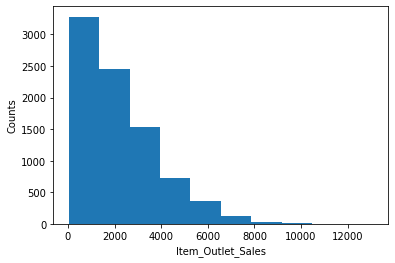

In [63]:
plt.hist(Train_Raw["Item_Outlet_Sales"]);
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Counts");


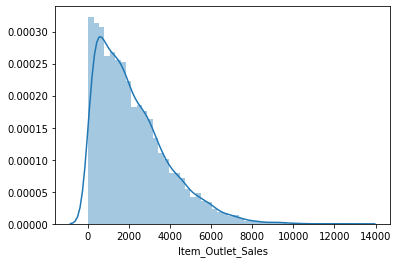

In [67]:
sns.distplot(Train_Raw["Item_Outlet_Sales"]);

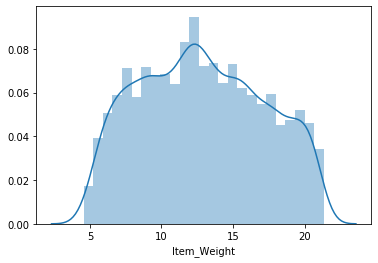

In [80]:
sns.distplot(Train_Raw["Item_Weight"]);

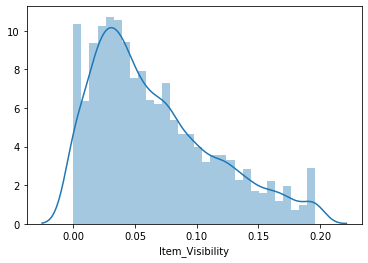

In [81]:
sns.distplot(Train_Raw["Item_Visibility"]);

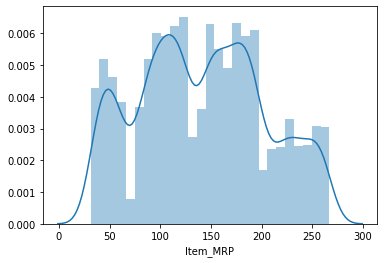

In [82]:
sns.distplot(Train_Raw["Item_MRP"]);

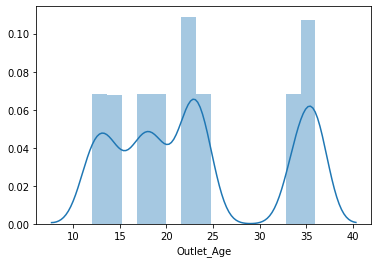

In [83]:
sns.distplot(Train_Raw["Outlet_Age"]);

In [85]:
Train_Raw["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

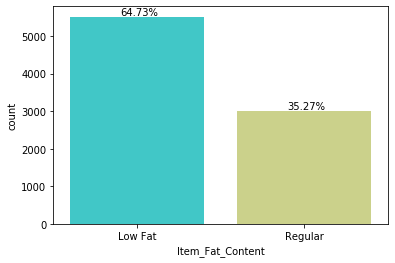

In [128]:
sns.countplot(Train_Raw["Item_Fat_Content"],palette = "rainbow")
plt.text(x = -0.1,y = Train_Raw["Item_Fat_Content"].value_counts()[0]+50,
         s = str(round((Train_Raw["Item_Fat_Content"].value_counts()[0])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 0.9,y = Train_Raw["Item_Fat_Content"].value_counts()[1]+50,
         s = str(round((Train_Raw["Item_Fat_Content"].value_counts()[1])*100/(len(Train_Raw)),2)) + "%")
plt.show()

In [105]:
Train_Raw["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

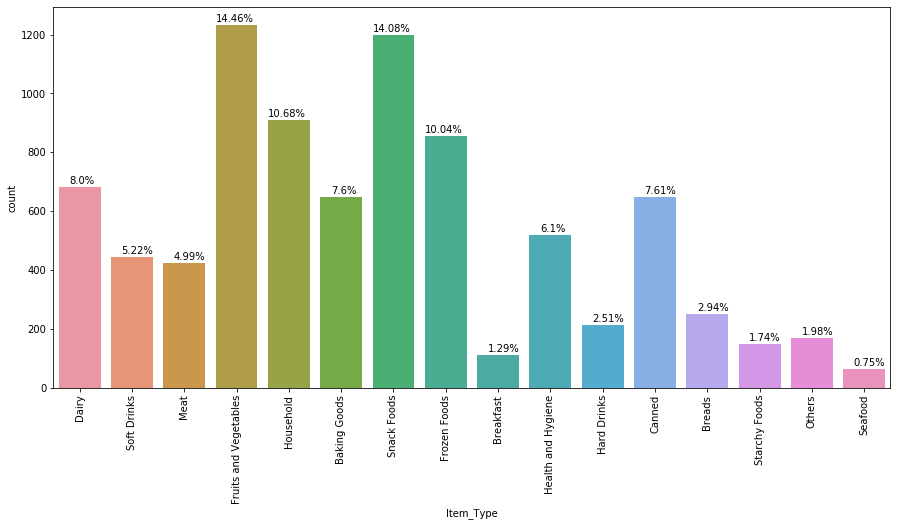

In [121]:
plt.figure(figsize = (15,7))
sns.countplot(Train_Raw["Item_Type"])
plt.xticks(rotation = "vertical");
plt.text(x = -0.2,y = Train_Raw["Item_Type"].value_counts()[4]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[4])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 0.8,y = Train_Raw["Item_Type"].value_counts()[8]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[8])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 1.8,y = Train_Raw["Item_Type"].value_counts()[9]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[9])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 2.6,y = Train_Raw["Item_Type"].value_counts()[0]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[0])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 3.6,y = Train_Raw["Item_Type"].value_counts()[2]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[2])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 4.8,y = Train_Raw["Item_Type"].value_counts()[6]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[6])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 5.6,y = Train_Raw["Item_Type"].value_counts()[1]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[1])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 6.6,y = Train_Raw["Item_Type"].value_counts()[3]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[3])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 7.8,y = Train_Raw["Item_Type"].value_counts()[14]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[14])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 8.8,y = Train_Raw["Item_Type"].value_counts()[7]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[7])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 9.8,y = Train_Raw["Item_Type"].value_counts()[11]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[11])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 10.8,y = Train_Raw["Item_Type"].value_counts()[5]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[5])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 11.8,y = Train_Raw["Item_Type"].value_counts()[10]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[10])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 12.8,y = Train_Raw["Item_Type"].value_counts()[13]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[13])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 13.8,y = Train_Raw["Item_Type"].value_counts()[12]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[12])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 14.8,y = Train_Raw["Item_Type"].value_counts()[15]+10,
         s = str(round((Train_Raw["Item_Type"].value_counts()[15])*100/(len(Train_Raw)),2)) + "%")

plt.show();

In [122]:
Train_Raw["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

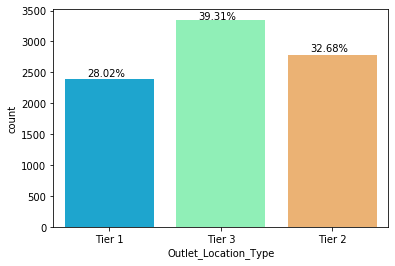

In [136]:
sns.countplot(Train_Raw["Outlet_Location_Type"],palette = "rainbow");
plt.text(x = -0.2,y = Train_Raw["Outlet_Location_Type"].value_counts()[2]+50,
         s = str(round((Train_Raw["Outlet_Location_Type"].value_counts()[2])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 0.8,y = Train_Raw["Outlet_Location_Type"].value_counts()[0],
         s = str(round((Train_Raw["Outlet_Location_Type"].value_counts()[0])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 1.8,y = Train_Raw["Outlet_Location_Type"].value_counts()[1]+50,
         s = str(round((Train_Raw["Outlet_Location_Type"].value_counts()[1])*100/(len(Train_Raw)),2)) + "%")
plt.show();

In [137]:
Train_Raw["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

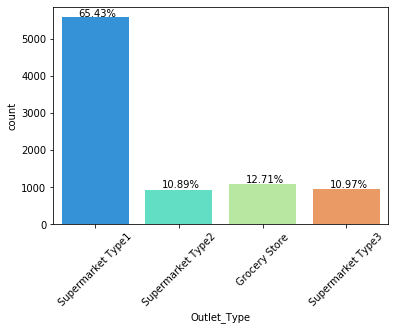

In [147]:
sns.countplot(Train_Raw["Outlet_Type"],palette = "rainbow")
plt.xticks(rotation = 45)
plt.text(x = -0.2,y = Train_Raw["Outlet_Type"].value_counts()[0]+10,
         s = str(round((Train_Raw["Outlet_Type"].value_counts()[0])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 0.8,y = Train_Raw["Outlet_Type"].value_counts()[3]+50,
         s = str(round((Train_Raw["Outlet_Type"].value_counts()[3])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 1.8,y = Train_Raw["Outlet_Type"].value_counts()[1]+50,
         s = str(round((Train_Raw["Outlet_Type"].value_counts()[1])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 2.8,y = Train_Raw["Outlet_Type"].value_counts()[2]+50,
         s = str(round((Train_Raw["Outlet_Type"].value_counts()[2])*100/(len(Train_Raw)),2)) + "%")

plt.show();

In [150]:
Train_Raw["Outlet_Size"].value_counts()


Small     4090
Medium    3494
High       939
Name: Outlet_Size, dtype: int64

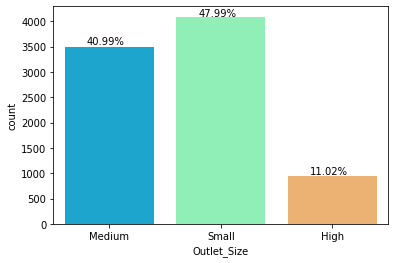

In [155]:
sns.countplot(Train_Raw["Outlet_Size"],palette = "rainbow")
plt.text(x = -0.2,y = Train_Raw["Outlet_Size"].value_counts()[1]+50,
         s = str(round((Train_Raw["Outlet_Size"].value_counts()[1])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 0.8,y = Train_Raw["Outlet_Size"].value_counts()[0]+10,
         s = str(round((Train_Raw["Outlet_Size"].value_counts()[0])*100/(len(Train_Raw)),2)) + "%")
plt.text(x = 1.8,y = Train_Raw["Outlet_Size"].value_counts()[2]+50,
         s = str(round((Train_Raw["Outlet_Size"].value_counts()[2])*100/(len(Train_Raw)),2)) + "%")

plt.show();

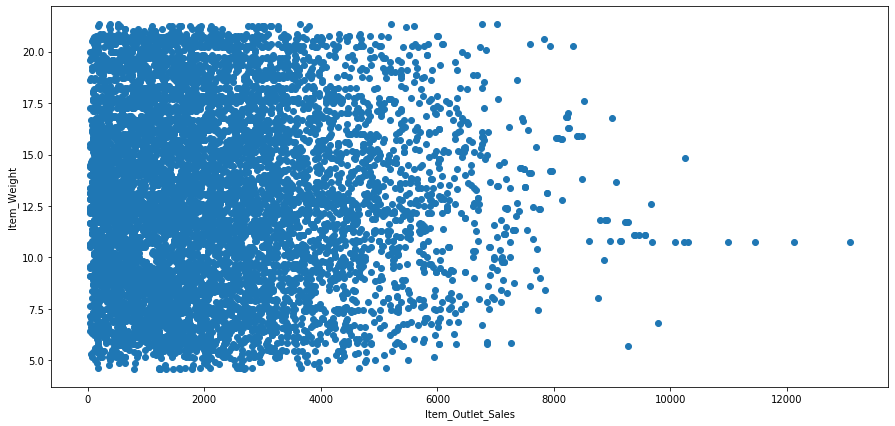

In [160]:
plt.figure(figsize = (15,7))
plt.scatter("Item_Outlet_Sales","Item_Weight",data = Train_Raw)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Item_Weight");

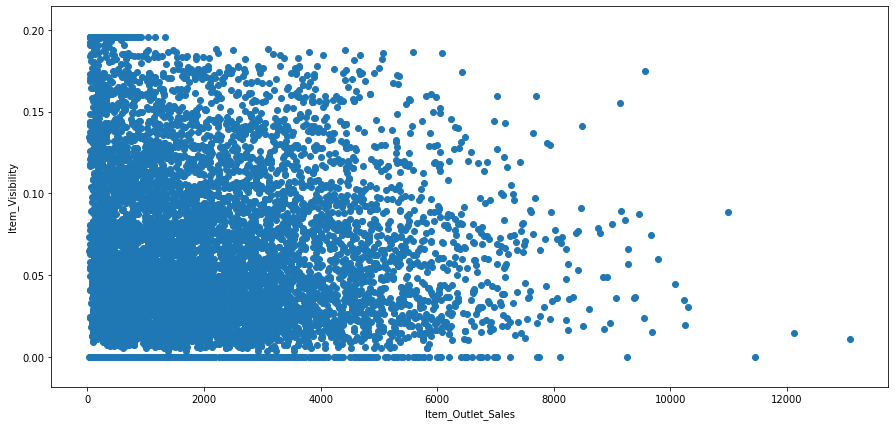

In [161]:
plt.figure(figsize = (15,7))
plt.scatter("Item_Outlet_Sales","Item_Visibility",data = Train_Raw)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Item_Visibility");

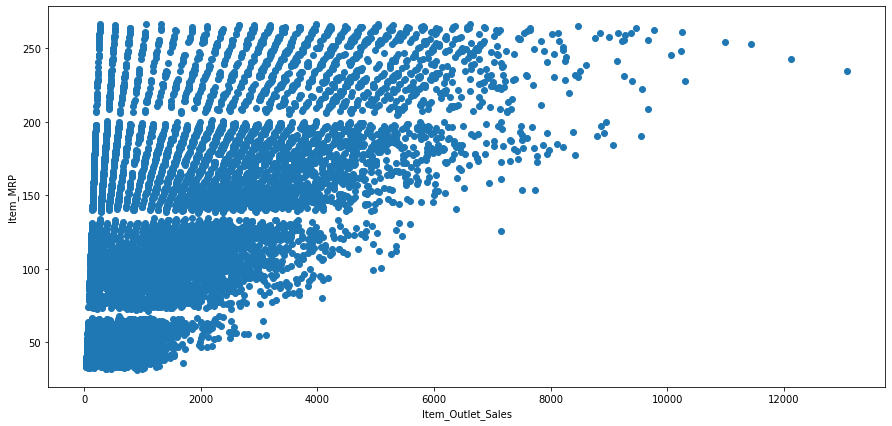

In [162]:
plt.figure(figsize = (15,7))
plt.scatter("Item_Outlet_Sales","Item_MRP",data = Train_Raw)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Item_MRP");

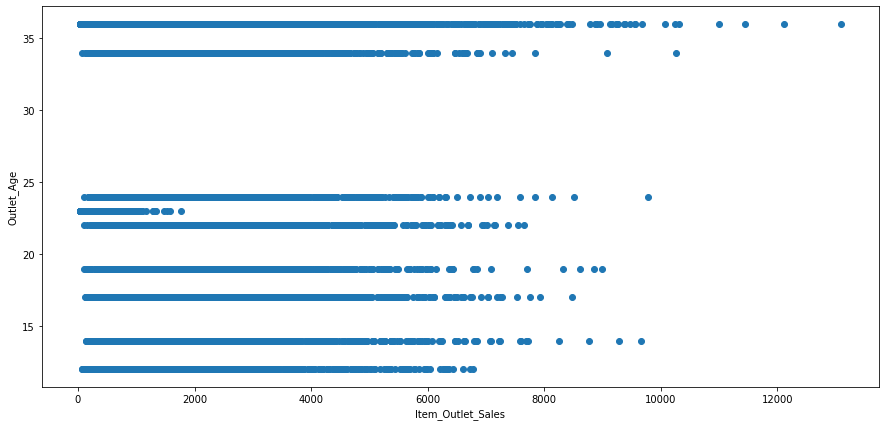

In [164]:
plt.figure(figsize = (15,7))
plt.scatter("Item_Outlet_Sales","Outlet_Age",data = Train_Raw)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Outlet_Age");

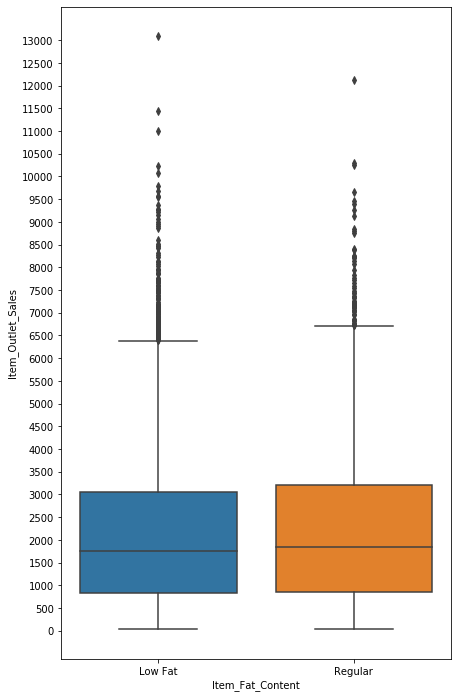

In [182]:
plt.figure(figsize = (7,12))
sns.boxplot(y = Train_Raw["Item_Outlet_Sales"],x = Train_Raw["Item_Fat_Content"]);
plt.yticks(np.arange(0,13500,500));

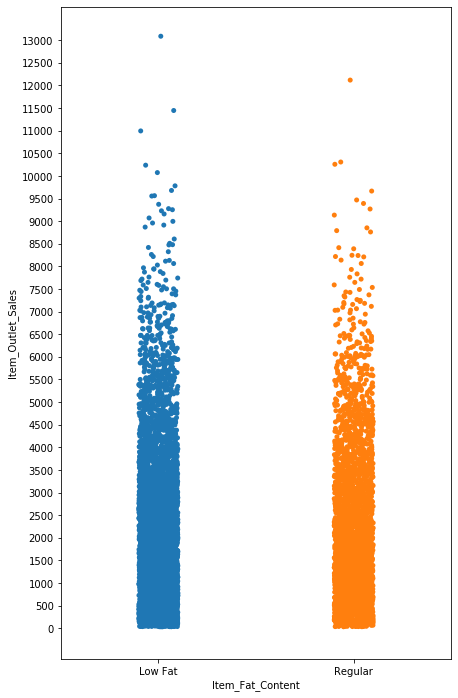

In [180]:
plt.figure(figsize = (7,12))
sns.stripplot(y = Train_Raw["Item_Outlet_Sales"],x = Train_Raw["Item_Fat_Content"]);
plt.yticks(np.arange(0,13500,500));

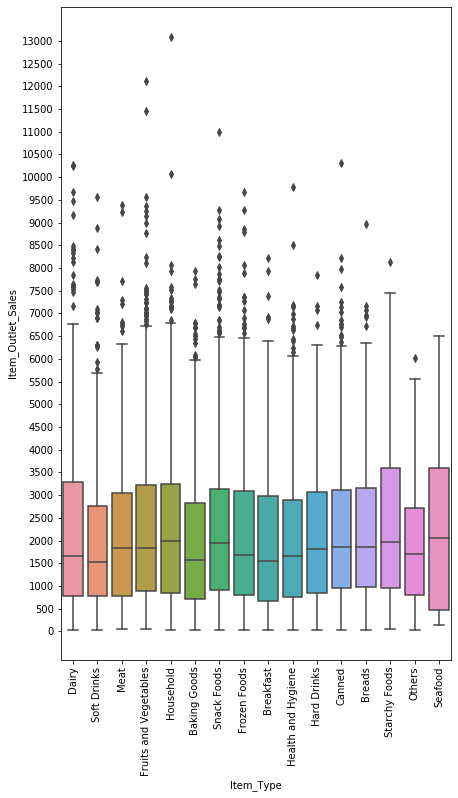

In [187]:
plt.figure(figsize = (7,12))
sns.boxplot(y = Train_Raw["Item_Outlet_Sales"],x = Train_Raw["Item_Type"]);
plt.yticks(np.arange(0,13500,500))
plt.xticks(rotation = "vertical");

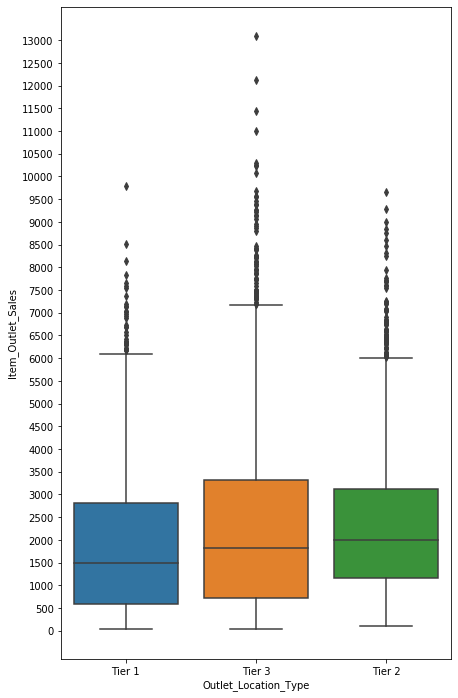

In [189]:
plt.figure(figsize = (7,12))
sns.boxplot(y = Train_Raw["Item_Outlet_Sales"],x = Train_Raw["Outlet_Location_Type"]);
plt.yticks(np.arange(0,13500,500));

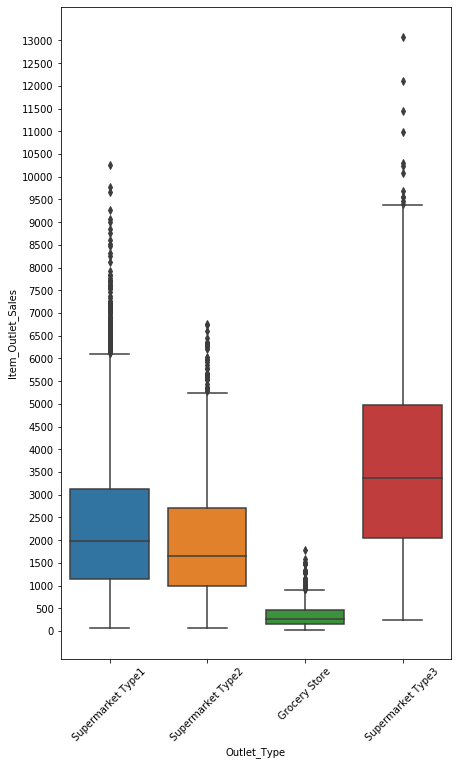

In [192]:
plt.figure(figsize = (7,12))
sns.boxplot(y = Train_Raw["Item_Outlet_Sales"],x = Train_Raw["Outlet_Type"]);
plt.yticks(np.arange(0,13500,500))
plt.xticks(rotation = 45);

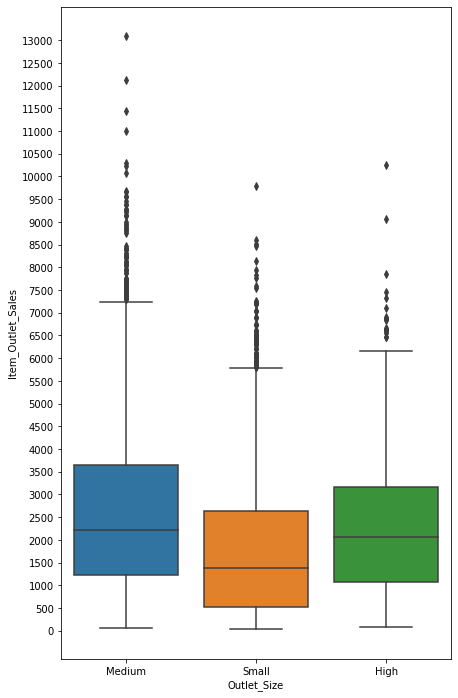

In [193]:
plt.figure(figsize = (7,12))
sns.boxplot(y = Train_Raw["Item_Outlet_Sales"],x = Train_Raw["Outlet_Size"]);
plt.yticks(np.arange(0,13500,500));

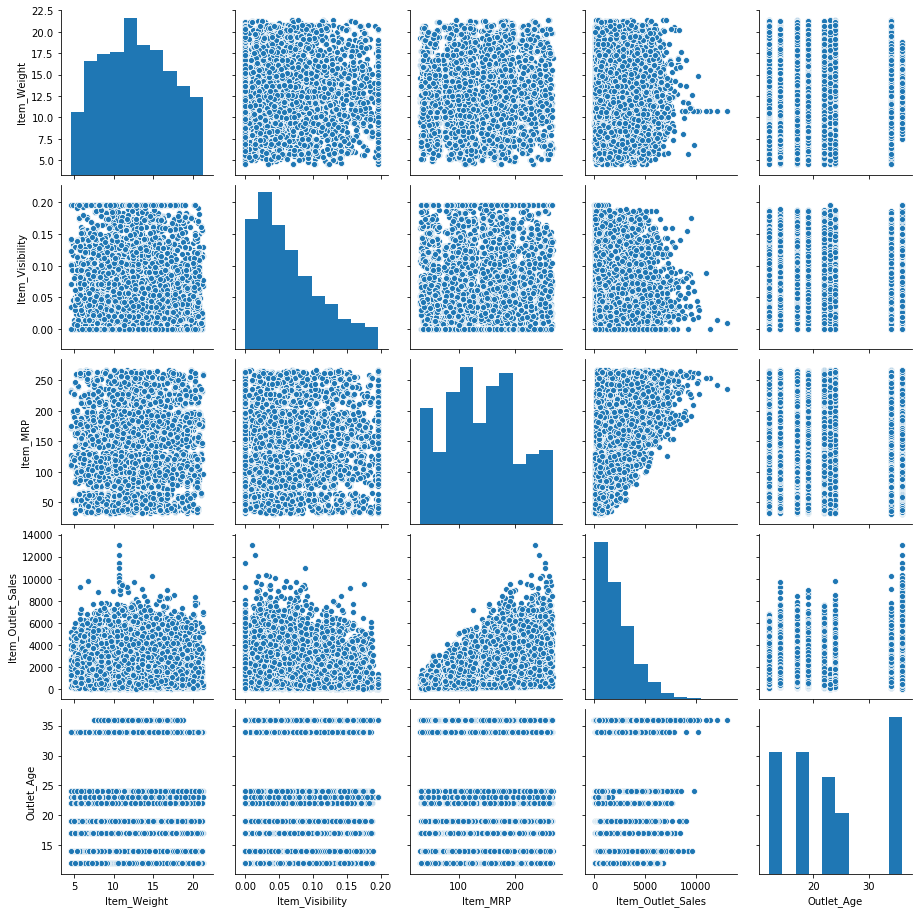

In [195]:
sns.pairplot(Train_Raw);

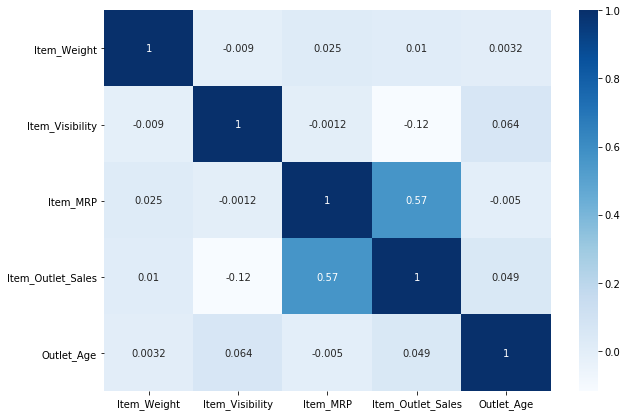

In [199]:
plt.figure(figsize = (10,7))
sns.heatmap(Train_Raw.corr(),annot = True,cmap = "Blues");

In [32]:
df_features = Train_Raw.drop("Item_Outlet_Sales",axis = 1)

In [33]:
df_target = Train_Raw["Item_Outlet_Sales"]

In [34]:
df_dum = pd.get_dummies(df_features,drop_first = True)
df_dum

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_Medium,Outlet_Size_Small
0,9.300,0.016047,249.8092,22,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,5.920,0.019278,48.2692,12,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
2,17.500,0.016760,141.6180,22,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,19.200,0.000000,182.0950,23,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,8.930,0.000000,53.8614,34,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,34,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
8519,8.380,0.046982,108.1570,19,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
8520,10.600,0.035186,85.1224,17,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
8521,7.210,0.145221,103.1332,12,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


Item_Fat_Content         True
Item_Type                True
Outlet_Location_Type     True
Outlet_Type              True
Item_Weight             False
Item_Visibility         False
Item_MRP                False
Outlet_Size              True
Item_Outlet_Sales       False
Outlet_Age              False
dtype: bool

In [46]:
Train_Raw 

,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Age
0,Low Fat,Dairy,Tier 1,Supermarket Type1,9.300,0.016047,249.8092,Medium,3735.1380,22
1,Regular,Soft Drinks,Tier 3,Supermarket Type2,5.920,0.019278,48.2692,Medium,443.4228,12
2,Low Fat,Meat,Tier 1,Supermarket Type1,17.500,0.016760,141.6180,Medium,2097.2700,22
3,Regular,Fruits and Vegetables,Tier 3,Grocery Store,19.200,0.000000,182.0950,Small,732.3800,23
4,Low Fat,Household,Tier 3,Supermarket Type1,8.930,0.000000,53.8614,High,994.7052,34
...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,Tier 3,Supermarket Type1,6.865,0.056783,214.5218,High,2778.3834,34
8519,Regular,Baking Goods,Tier 2,Supermarket Type1,8.380,0.046982,108.1570,Medium,549.2850,19
8520,Low Fat,Health and Hygiene,Tier 2,Supermarket Type1,10.600,0.035186,85.1224,Small,1193.1136,17
8521,Regular,Snack Foods,Tier 3,Supermarket Type2,7.210,0.145221,103.1332,Medium,1845.5976,12


In [35]:
cat_var = [col for col in df_features.columns if df_features[col].dtypes == "object" ]
df_features[cat_var]

,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Type,Outlet_Size
0,Low Fat,Dairy,Tier 1,Supermarket Type1,Medium
1,Regular,Soft Drinks,Tier 3,Supermarket Type2,Medium
2,Low Fat,Meat,Tier 1,Supermarket Type1,Medium
3,Regular,Fruits and Vegetables,Tier 3,Grocery Store,Small
4,Low Fat,Household,Tier 3,Supermarket Type1,High
...,...,...,...,...,...
8518,Low Fat,Snack Foods,Tier 3,Supermarket Type1,High
8519,Regular,Baking Goods,Tier 2,Supermarket Type1,Medium
8520,Low Fat,Health and Hygiene,Tier 2,Supermarket Type1,Small
8521,Regular,Snack Foods,Tier 3,Supermarket Type2,Medium


In [36]:
num_var = [col for col in df_features.columns if df_features[col].dtypes != "object"]
df_features[num_var]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,9.300,0.016047,249.8092,22
1,5.920,0.019278,48.2692,12
2,17.500,0.016760,141.6180,22
3,19.200,0.000000,182.0950,23
4,8.930,0.000000,53.8614,34
...,...,...,...,...
8518,6.865,0.056783,214.5218,34
8519,8.380,0.046982,108.1570,19
8520,10.600,0.035186,85.1224,17
8521,7.210,0.145221,103.1332,12


In [37]:
dum_cat = pd.get_dummies(df_features[cat_var])
dum_cat

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8519,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
8520,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [38]:
standardization = (df_features[num_var] - df_features[num_var].mean())/df_features[num_var].std()
standardization

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.821627,-1.008569,1.747351,-0.139533
1,-1.605272,-0.942418,-1.488936,-1.334024
2,1.079522,-0.993975,0.010040,-0.139533
3,1.473663,-1.337130,0.660011,-0.020083
4,-0.907411,-1.337130,-1.399138,1.293858
...,...,...,...,...
8518,-1.386176,-0.174517,1.180714,1.293858
8519,-1.034927,-0.375187,-0.527270,-0.497880
8520,-0.520225,-0.616708,-0.897155,-0.736779
8521,-1.306188,1.636194,-0.607941,-1.334024


In [39]:
Raw = pd.concat([dum_cat,standardization],axis = 1)
Raw

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,-0.821627,-1.008569,1.747351,-0.139533
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,-1.605272,-0.942418,-1.488936,-1.334024
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1.079522,-0.993975,0.010040,-0.139533
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1.473663,-1.337130,0.660011,-0.020083
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,-0.907411,-1.337130,-1.399138,1.293858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,-1.386176,-0.174517,1.180714,1.293858
8519,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,-1.034927,-0.375187,-0.527270,-0.497880
8520,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,-0.520225,-0.616708,-0.897155,-0.736779
8521,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,-1.306188,1.636194,-0.607941,-1.334024


In [47]:
X = Raw.copy()
Y = df_target

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.80,random_state = 10)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(X_test.shape)

(6818, 32)
(6818,)
(1705, 32)
(1705, 32)


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

C:\Users\GOJIRAH\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                            feature           VIF
0          Item_Fat_Content_Low Fat  2.524770e+05
1          Item_Fat_Content_Regular  1.050461e+06
2            Item_Type_Baking Goods           inf
3                  Item_Type_Breads           inf
4               Item_Type_Breakfast           inf
5                  Item_Type_Canned           inf
6                   Item_Type_Dairy  8.114136e+06
7            Item_Type_Frozen Foods  4.931266e+08
8   Item_Type_Fruits and Vegetables  2.752659e+07
9             Item_Type_Hard Drinks           inf
10     Item_Type_Health and Hygiene           inf
11              Item_Type_Household  7.392686e+06
12                   Item_Type_Meat           inf
13                 Item_Type_Others  1.391616e+09
14                Item_Type_Seafood  2.815785e+09
15            Item_Type_Snack Foods  2.705416e+06
16            Item_Type_Soft Drinks  3.847741e+08
17          Item_Type_Starchy Foods  3.898427e+10
18      Outlet_Location_Type_Tier 1  7.266249e+05


In [66]:
from sklearn.linear_model import SGDRegressor
sgdModel = SGDRegressor(fit_intercept = False, random_state = 7) 
sgdModel.fit(X_train, Y_train)

SGDRegressor(fit_intercept=False, random_state=7)

In [69]:
sgdModel.coef_

array([  582.79303932,   604.71034752,    79.14456677,   114.27733572,
          44.81611959,   123.3117736 ,    18.19510181,    34.63882623,
         118.11543602,    41.93876307,    75.17960712,     6.25519748,
         108.32494314,    27.68902483,   195.58118421,    46.55114036,
          17.90163334,   135.58273355,   199.54363328,   413.1201816 ,
         574.83957197, -1435.85085979,   815.2769533 ,   379.1219298 ,
        1428.95536353,   -62.54034842,   698.00522921,   552.03850604,
           6.51359894,    -8.10152806,   945.12831672,   193.60113371])

In [43]:
pd.DataFrame({"Variable": X_train.columns, "Coeff": sgdModel.coef_})

,Variable,Coeff
0,Item_Fat_Content_Low Fat,582.793039
1,Item_Fat_Content_Regular,604.710348
2,Item_Type_Baking Goods,79.144567
3,Item_Type_Breads,114.277336
4,Item_Type_Breakfast,44.816120
5,Item_Type_Canned,123.311774
6,Item_Type_Dairy,18.195102
7,Item_Type_Frozen Foods,34.638826
8,Item_Type_Fruits and Vegetables,118.115436
9,Item_Type_Hard Drinks,41.938763


In [67]:
testPred = sgdModel.predict(X_test)
pd.DataFrame({"Actual": Y_test[:6], "Prediction": testPred[0:6]})

,Actual,Prediction
7186,3649.2498,4078.366405
2283,1845.5976,1669.960681
2206,2675.1844,3232.042130
5446,675.7870,1404.577381
6380,3755.1120,3138.741912
5571,2566.6590,2699.935957


In [68]:
# RMSE
np.sqrt(np.mean((Y_test - testPred)**2))

1126.1435582568631

In [69]:
# MAPE
(np.mean(np.abs(((Y_test - testPred)/Y_test))))*100

103.80179037747068

In [70]:
from statsmodels.api import add_constant, OLS
closedFormModel = OLS(Y_train, X_train).fit()
closedFormModel.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     308.6
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:07:16   Log-Likelihood:                -57599.
No. Observations:                6818   AIC:                         1.153e+05
Df Residuals:                    6789   BIC:                         1.155e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_Fat_Content_Low Fat         1.835e+14   7.42e+14      0.247      0.805   -1.27e+15    1.64e+15
Item_Fat_Content_Regular         1.835e+14   7.42e+14      0.247      0.805   -1.27e+15    1.64e+15
Item_Type_Baking Goods          -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Breads                -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Breakfast             -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Canned                -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Dairy                 -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Frozen Foods          -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Fruits and Vegetables -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Hard Drinks           -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Health and Hygiene    -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Household             -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Meat                  -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Others                -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Seafood               -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Snack Foods           -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Soft Drinks           -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Item_Type_Starchy Foods         -2.676e+14    9.2e+14     -0.291      0.771   -2.07e+15    1.53e+15
Outlet_Location_Type_Tier 1      2.699e+14   1.16e+15      0.233      0.816      -2e+15    2.54e+15
Outlet_Location_Type_Tier 2      2.699e+14   1.16e+15      0.233      0.816      -2e+15    2.54e+15
Outlet_Location_Type_Tier 3      2.699e+14   1.16e+15      0.233      0.816      -2e+15    2.54e+15
Outlet_Type_Grocery Store       -5.708e+14   1.91e+15     -0.299      0.765   -4.31e+15    3.17e+15
Outlet_Type_Supermarket Type1   -5.708e+14   1.91e+15     -0.299      0.765   -4.31e+15    3.17e+15
Outlet_Type_Supermarket Type2   -5.708e+14   1.91e+15     -0.299      0.765   -4.31e+15    3.17e+15
Outlet_Type_Supermarket Type3   -5.708e+14   1.91e+15     -0.299      0.765   -4.31e+15    3.17e+15
Outlet_Size_High                  3.85e+14   1.56e+15      0.247      0.805   -2.67e+15    3.44e+15
Outlet_Size_Medium                3.85e+14   1.56e+15      0.247      0.805   -2.67e+15    3.44e+15
Outlet_Size_Small                 3.85e+14   1.56e+15      0.247      0.805   -2.67

In [71]:
testPred = closedFormModel.predict(X_test)
pd.DataFrame({"Actual": Y_test[:6], "Prediction": testPred[0:6]})

,Actual,Prediction
7186,3649.2498,4122.669878
2283,1845.5976,1660.042840
2206,2675.1844,3083.506583
5446,675.7870,1366.485800
6380,3755.1120,3052.244465
5571,2566.6590,2687.732726


In [72]:
# RMSE
np.sqrt(np.mean((Y_test - testPred)**2))

1122.9370691318527

In [73]:
# MAPE
(np.mean(np.abs(((Y_test - testPred)/Y_test))))*100

104.66016586682355

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor

In [76]:
M1 = RandomForestRegressor(random_state=123)
M1 = M1.fit(X_train, Y_train)

In [77]:
testPredDf = pd.DataFrame()

testPredDf["Prediction"] = M1.predict(X_test)

# Create a column to store actuals
testPredDf["Actual"] = Y_test.values

# Validate if the above worked
testPredDf.head()

,Prediction,Actual
0,4564.258740,3649.2498
1,1956.220270,1845.5976
2,2066.982758,2675.1844
3,1606.388976,675.7870
4,2983.136874,3755.1120


In [78]:
# RMSE
print(np.sqrt(np.mean((testPredDf["Actual"] - testPredDf["Prediction"])**2)))
# This means on an "average", the taxi fare prediction would have +/- error of about $3.78
# Lower the RMSE, better the model prediction

# MAPE
print((np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)
# This means on an "average", the taxi fare prediction would have +/- error of ~19%
# Lower the MAPE, better the model prediction

1113.3968772769808
56.69247751097356
